In [15]:
import json
import numpy as np

In [16]:
fs = open('songs_1.json','r')
s_json = json.load(fs)
fs.close()
print('there are {} songs'.format(len(s_json)))

there are 5835 songs


In [17]:
fc = open('chords.json','r')
c_json = json.load(fc)
fc.close()
print('there are {} chords'.format(len(c_json)))

there are 276 chords


In [123]:
chords = {}
songs = []

for c in c_json:
    name = c["name"]
    frets = c["frets"]
    fingers = c["fingers"]
    chords[name] = (frets, fingers)

for s in s_json:
    songs.append(s) 

In [124]:
def chord_transition_cost(c0, c1, verbose=False):
    '''
    So we want to look at each finger, see which fret it started and ended on, and take the manhattan distance
    of that
    Add up all of those
    
    fing[i] represents which finger should be on string i
    fret[i] represents which fret should be pressed on string i
    
    we look at the nonzero fret values, and see the associated finger and string values
    and from this we can construct a map from fingers to string and fret
    
    but how to deal with barring(I think we should just take the first fret that we find a finger for)
    '''
    start = [None, None, None, None]
    end = [None, None, None, None]
    
    for string in range(4):
        start_fret = int(c0[0][string])
        end_fret = int(c1[0][string])
        start_finger = int(c0[1][string])
        end_finger = int(c1[1][string])
        if(start_finger != 0 and start[start_finger-1] is None):
            start[start_finger-1] = (string, start_fret)
        if(end_finger != 0 and end[end_finger-1] is None):
            end[end_finger-1] = (string, end_fret)
    if verbose:
        print(start)
        print(end)
    
    cost = 0
    for i in range(4):
        if(end[i] is None):
            cost += 0 #removing a finger (or potentially not using a finger)
        elif(start[i] is None):
            cost += end[i][1] #the cost is just the fret that you place the finger on
        else:
            cost += abs(start[i][0] - end[i][0]) + abs(start[i][1] - end[i][1])
            #manhattan distance between start and end frets/strings
    
    return cost

def ctc(c0, c1):
    return chord_transition_cost(chords[c0], chords[c1])

In [125]:
ctc('Cm7', 'C')

3

In [21]:
chords

{'A': ('2100', '2100'),
 'Am': ('2000', '2000'),
 'Aaug': ('2114', '2114'),
 'Adim': ('1242', '1243'),
 'A7': ('0100', '0100'),
 'Am7': ('0000', '0000'),
 'Amaj7': ('1100', '1200'),
 'Aaug7': ('0110', '0120'),
 'Adim7': ('2323', '1324'),
 'Am7b5': ('2333', '1333'),
 'Aadd9': ('2102', '2103'),
 'Amadd9': ('2002', '1002'),
 'A6': ('2424', '1314'),
 'Am6': ('2423', '1312'),
 'A5': ('2400', '1300'),
 'A9': ('2132', '2143'),
 'Am9': ('1032', '1032'),
 'A11': ('2232', '1121'),
 'A13': ('0120', '0120'),
 'Asus2': ('1341', '1341'),
 'Asus4': ('2200', '2300'),
 'A7sus2': ('4430', '2310'),
 'A7sus4': ('0200', '0200'),
 'Bb': ('3211', '3211'),
 'Bbm': ('3111', '3111'),
 'Bbaug': ('3221', '4231'),
 'Bbdim': ('3101', '3102'),
 'Bb7': ('1211', '1211'),
 'Bbm7': ('1111', '1111'),
 'Bbmaj7': ('3210', '3210'),
 'Bbaug7': ('1221', '1231'),
 'Bbdim7': ('0101', '0203'),
 'Bbm7b5': ('1101', '1203'),
 'Bbadd9': ('3213', '3214'),
 'Bbmadd9': ('3113', '2113'),
 'Bb6': ('0211', '0211'),
 'Bbm6': ('0111', '0111

In [22]:
print([songs[i] for i in range(2)])

[{'artist': '10cc', 'song': 'the-things-we-do-for-love', 'chords': ['G', 'D', 'Em', 'D', 'G', 'D', 'Am7', 'Bbm', 'Gb', 'Db', 'Fm', 'Eb', 'Gb', 'F', 'Ebm', 'Db', 'Gb', 'Db', 'Bbm', 'Gb', 'Db', 'Fm', 'Eb', 'Gb', 'Bbm', 'F', 'Ebm', 'Db', 'Gb', 'Db', 'Db', 'Db', 'Db', 'Db', 'Ebm', 'Ebm', 'Ab7', 'Ab7', 'Bbm', 'Db', 'Gb', 'Eb', 'Ab', 'F', 'Bbm', 'Gbm', 'G', 'D', 'Em', 'D', 'G', 'D', 'Am7', 'Bbm', 'Gb', 'Db', 'Fm', 'Eb', 'Gb', 'Bbm', 'F', 'Ebm', 'Db', 'Gb', 'Db', 'Db', 'Db', 'Db', 'Db', 'Ebm', 'Ebm', 'Ab7', 'Ab7', 'Bbm', 'Db', 'Gb', 'Eb', 'Ab', 'F', 'Bbm', 'Gbm', 'G', 'D', 'Em', 'D', 'G', 'D', 'Am7', 'Bbm', 'Gb', 'Db', 'Fm', 'Eb', 'Gb', 'Bbm', 'F', 'Ebm', 'Db', 'Gb', 'Db', 'Ebm7', 'Db', 'Gb', 'Db', 'Ebm7', 'Db', 'Gb', 'Db'], 'difficulty': 4}, {'artist': '2ne1', 'song': 'come-back-home', 'chords': ['Am', 'C', 'G', 'F', 'Am', 'C', 'G', 'F', 'Dm', 'G', 'C', 'F', 'Dm', 'G', 'Am', 'F', 'C', 'E', 'Am', 'F', 'C', 'E', 'Am', 'Am', 'C', 'G', 'F', 'Am', 'C', 'G', 'F', 'Dm', 'G', 'C', 'F', 'Dm', 'G', 'A

In [23]:
test = songs[0]['chords']
l = len(test)
total = 0
for i in range(l - 1):
    cost = ctc(test[i], test[i+1])
    print(test[i], " to ", test[i+1],": {}".format(cost))
    total += cost
print("total cost: {}".format(total))
print("normalized cost: {}".format(total/l))

G  to  D : 4
D  to  Em : 8
Em  to  D : 8
D  to  G : 4
G  to  D : 4
D  to  Am7 : 0
Am7  to  Bbm : 4
Bbm  to  Gb : 2
Gb  to  Db : 5
Db  to  Fm : 2
Fm  to  Eb : 7
Eb  to  Gb : 5
Gb  to  F : 3
F  to  Ebm : 9
Ebm  to  Db : 6
Db  to  Gb : 6
Gb  to  Db : 5
Db  to  Bbm : 4
Bbm  to  Gb : 2
Gb  to  Db : 5
Db  to  Fm : 2
Fm  to  Eb : 7
Eb  to  Gb : 5
Gb  to  Bbm : 0
Bbm  to  F : 3
F  to  Ebm : 9
Ebm  to  Db : 6
Db  to  Gb : 6
Gb  to  Db : 5
Db  to  Db : 0
Db  to  Db : 0
Db  to  Db : 0
Db  to  Db : 0
Db  to  Ebm : 11
Ebm  to  Ebm : 0
Ebm  to  Ab7 : 6
Ab7  to  Ab7 : 0
Ab7  to  Bbm : 2
Bbm  to  Db : 5
Db  to  Gb : 6
Gb  to  Eb : 6
Eb  to  Ab : 8
Ab  to  F : 5
F  to  Bbm : 4
Bbm  to  Gbm : 5
Gbm  to  G : 5
G  to  D : 4
D  to  Em : 8
Em  to  D : 8
D  to  G : 4
G  to  D : 4
D  to  Am7 : 0
Am7  to  Bbm : 4
Bbm  to  Gb : 2
Gb  to  Db : 5
Db  to  Fm : 2
Fm  to  Eb : 7
Eb  to  Gb : 5
Gb  to  Bbm : 0
Bbm  to  F : 3
F  to  Ebm : 9
Ebm  to  Db : 6
Db  to  Gb : 6
Gb  to  Db : 5
Db  to  Db : 0
Db  to  Db : 0
Db

In [24]:
def levenshtein(str1, str2):
    l1 = len(str1) + 1 #accound for empty letter at the beginning of the word
    l2 = len(str2) + 1
    dp = np.zeros((l1, l2))
    for i in range(l1):
        dp[i][0] = i
    for j in range(l2):
        dp[0][j] = j
        
    for i in range(l1 - 1):
        for j in range(l2 - 1):
            c1 = str1[i]
            c2 = str2[j]
            val = 0
            if c1 == c2:
                val = dp[i][j]
            else:
                val = min(dp[i][j], dp[i+1][j], dp[i][j+1]) + 1
            dp[i+1][j+1] = val
    print(dp)

In [319]:
def chord_lev(chord1, chord2, verbose=True):
    # there's one less chord transition than there are chords
    l1 = len(chord1) 
    l2 = len(chord2)
    dp = np.zeros((l1,l2))
    for i in range(l1-1):
        dp[i+1][0] = dp[i][0] + ctc(chord1[i], chord1[i+1])
    for j in range(l2-1):
        dp[0][j+1] = dp[0][j] + ctc(chord2[j], chord2[j+1])
    
    for i in range(1, l1):
        for j in range(1,l2):
            t1 = (chord1[i-1], chord1[i]) #transtion a
            t2 = (chord2[j-1], chord2[j]) #transition b
            val = 0
            if t1 == t2: #if the chords are equal, then the cost 
                val = dp[i-1][j-1]
            else:
                '''
                chords 1: a1, a2, a3... an
                chords 2: b1, b2, b3... bm
                
                replacing ai with bj:
                    original: ai-1 -> ai -> ai+1
                    new: ai-1 -> bj -> ai+1
                    cost: (ai-1->bj)
                deleting ai:
                    original: ai-1 -> ai -> ai+1
                    new: ai-1 -> ai+1
                    cost: (ai-1->ai+1) - (ai-1->i) - (ai->ai+1)
                inserting bj after ai:
                    original: ai-1 -> ai -> ai+1
                    new: ai-1 -> ai -> bj -> ai+1
                    cost: (ai->bj) + (bj->ai+1) - (ai->ai+1)
                '''
                '''
                replace at with bt is going to be +bt-at
                delete at = -at
                insert bt = +bt
                '''
                #or something like that
                replace = dp[i-1][j-1] - ctc(t1[0], t1[1]) + ctc(t2[0],t2[1])
                delete = dp[i-1][j] - ctc(t1[0],t1[1])
                insert = dp[i][j-1] + ctc(t2[0],t2[1])
                val = min(replace, delete, insert)
            dp[i][j] = val
    if verbose:
        print(dp)
    return(dp[l1-1][l2-1])
    

In [299]:
levenshtein('poke','peek')

[[0. 1. 2. 3. 4.]
 [1. 0. 1. 2. 3.]
 [2. 1. 1. 2. 3.]
 [3. 2. 2. 2. 2.]
 [4. 3. 2. 2. 3.]]


In [300]:
print(ctc('D','G'),ctc('C','D'),ctc('C','G'))

4 6 5


In [301]:
c1 = ['A','E','C','G']
c2 = ['A', 'E','C', 'D','G']
chord_lev(c1,c2)

[[ 0.  8. 11. 17. 21.]
 [ 8.  0.  3.  9. 13.]
 [11. -3.  0.  6. 10.]
 [16. -8. -5.  1.  5.]]


5.0

In [302]:
chord_lev(c2,c1)

[[  0.   8.  11.  16.]
 [  8.   0.   3.   8.]
 [ 11.  -3.   0.   5.]
 [ 17.  -9.  -6.  -1.]
 [ 21. -13. -10.  -5.]]


-5.0

aecg -> ae ec cg
acg -> ac cg

ae ec
ac


In [190]:
all_chord_names = list(chords.keys())
ctc_vals = set()
for i in all_chord_names:
    for j in all_chord_names:
        v = ctc(i,j)
        ctc_vals.add(v)
#         print(v)
print(ctc_vals)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18}


Hypotheses:

1) constructing a matrix between all possible song pairs, where each value is the modified levenshtien distance between the two songs, and doing svd on that matrix should give us ...?

2) we should be able to rank the songs based on our concieved metric and compare it against the rated difficulty on ukutabs. I expect very little deviation 

3) Find metadata by using https://en.wikipedia.org/wiki/List_of_online_music_databases and see if we can cluster based on that

4) 3-way tensor: song-chord-chord where T(i,j,k) gives us how many times the transition from j to k occured in song i. Doing a non-negative cpd on this dataset should give us clusterings based on the most common chord sequences.  Potentially do windowing to see larger chord sequences. 

5) 4-way tensor: song-transpose-chord-chord where T(i,j,k,l) gives us how many times the transition from k to l occured in song i transposed to key j.

Goals:

1) come up with a method to rank songs by difficulty (possibly ML)
2) come up with a method to cluster songs - songs in the same cluster should be similar to play
3) given an entirely new song, how to retrofit it into a cluster?

In [29]:
def song_difficulty(song):
    s_chr = song['chords']
    l = len(s_chr)
    total = 0
    for i in range(l - 1):
        cost = ctc(s_chr[i], s_chr[i+1])
#         print(test[i], " to ", test[i+1],": {}".format(cost))
        total += cost
# print("total cost: {}".format(total))
# print("normalized cost: {}".format(total/l))
    return (total/l)
    

In [30]:
songs[0]

{'artist': '10cc',
 'song': 'the-things-we-do-for-love',
 'chords': ['G',
  'D',
  'Em',
  'D',
  'G',
  'D',
  'Am7',
  'Bbm',
  'Gb',
  'Db',
  'Fm',
  'Eb',
  'Gb',
  'F',
  'Ebm',
  'Db',
  'Gb',
  'Db',
  'Bbm',
  'Gb',
  'Db',
  'Fm',
  'Eb',
  'Gb',
  'Bbm',
  'F',
  'Ebm',
  'Db',
  'Gb',
  'Db',
  'Db',
  'Db',
  'Db',
  'Db',
  'Ebm',
  'Ebm',
  'Ab7',
  'Ab7',
  'Bbm',
  'Db',
  'Gb',
  'Eb',
  'Ab',
  'F',
  'Bbm',
  'Gbm',
  'G',
  'D',
  'Em',
  'D',
  'G',
  'D',
  'Am7',
  'Bbm',
  'Gb',
  'Db',
  'Fm',
  'Eb',
  'Gb',
  'Bbm',
  'F',
  'Ebm',
  'Db',
  'Gb',
  'Db',
  'Db',
  'Db',
  'Db',
  'Db',
  'Ebm',
  'Ebm',
  'Ab7',
  'Ab7',
  'Bbm',
  'Db',
  'Gb',
  'Eb',
  'Ab',
  'F',
  'Bbm',
  'Gbm',
  'G',
  'D',
  'Em',
  'D',
  'G',
  'D',
  'Am7',
  'Bbm',
  'Gb',
  'Db',
  'Fm',
  'Eb',
  'Gb',
  'Bbm',
  'F',
  'Ebm',
  'Db',
  'Gb',
  'Db',
  'Ebm7',
  'Db',
  'Gb',
  'Db',
  'Ebm7',
  'Db',
  'Gb',
  'Db'],
 'difficulty': 4}

In [32]:
song_difficulty(songs[1])

3.4347826086956523

In [35]:
diffs = {}
for s in songs:
    d = song_difficulty(s)
    key = s['artist'] + ': ' + s['song']
    diffs[key] = (s['difficulty'], d)

In [49]:
import matplotlib.pyplot as plt

In [50]:
xs = []
ys = []
for v in diffs.values():
    ys.append(v[0])
    xs.append(v[1])


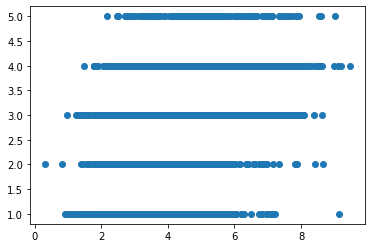

In [59]:
plt.scatter(xs,ys)
plt.show()

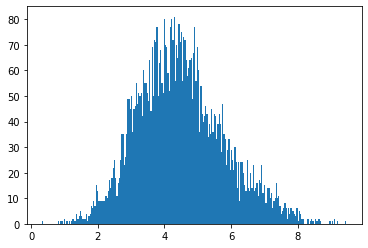

In [111]:
plt.hist(xs, bins=250)
plt.show()

In [89]:
all_c = []
for s in songs:
    all_c += s['chords']
len(all_c)

num_chords = len(all_c)

In [90]:
def to_counts(l):
    freq = {} 
    for item in l: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq

In [91]:
count_chords = to_counts(all_c)

sum(list(count_chords.values()))

count_chords = {k: v/num_chords for k, v in sorted(count_chords.items(), key=lambda item: item[1], reverse=True)}
count_chords

{'G': 0.10275387159097103,
 'C': 0.08838593367370629,
 'D': 0.0818772598160048,
 'A': 0.07358193075853102,
 'F': 0.0686317855044727,
 'E': 0.05462925390490149,
 'Bb': 0.0425708454210147,
 'Am': 0.04230436125562494,
 'B': 0.040840717165416006,
 'Ab': 0.0360763032993566,
 'Em': 0.03527886962262208,
 'Eb': 0.03408372851723769,
 'Gb': 0.03290070032846192,
 'Db': 0.029991581522957004,
 'Bm': 0.02512017022685474,
 'Dm': 0.022513874336565463,
 'Gbm': 0.02226959718495818,
 'Dbm': 0.019794524557929013,
 'Gm': 0.016332249227296862,
 'Cm': 0.016209101241775836,
 'Fm': 0.012619640286753112,
 'Abm': 0.012518699315014566,
 'Bbm': 0.012494473481797315,
 'Ebm': 0.009433943218684578,
 'Em7': 0.003958904911585803,
 'D7': 0.0034885199832841753,
 'E7': 0.00339161665041517,
 'Cadd9': 0.0032280922761987246,
 'Am7': 0.0031978099846771604,
 'G7': 0.0031392642210688036,
 'A7': 0.0026749357510714882,
 'B7': 0.0026729169316367174,
 'Bm7': 0.002481129085333479,
 'C7': 0.0021439862397267325,
 'Dm7': 0.002103609851

In [97]:
chord_transitions = {}
for song in songs:
    chords = song['chords']
    num_c = len(chords)
    for i in range(num_c - 1):
        pair = '(' + chords[i] + ', ' + chords[i+1] + ')'
        if pair in chord_transitions:
            chord_transitions[pair] += 1
        else:
            chord_transitions[pair] = 1
num_c_t = sum(chord_transitions.values())
chord_transitions = {k: v/num_c_t for k, v in sorted(chord_transitions.items(), key=lambda item: item[1], reverse=True)}
chord_transitions

{'(C, G)': 0.026048816761456494,
 '(G, D)': 0.023785301039419494,
 '(F, C)': 0.020819033143753676,
 '(D, A)': 0.019264398248022487,
 '(G, C)': 0.018112211544747337,
 '(D, G)': 0.017115284042622737,
 '(A, E)': 0.016373717068706283,
 '(C, F)': 0.014167402104987906,
 '(A, D)': 0.01351572203700072,
 '(E, B)': 0.012093874615937765,
 '(Am, F)': 0.011636268549388769,
 '(G, Am)': 0.01152186703275152,
 '(Bb, F)': 0.011239949009609727,
 '(F, G)': 0.01001421847421063,
 '(E, A)': 0.009938631757861019,
 '(Eb, Bb)': 0.009689399882329868,
 '(Em, C)': 0.009188893247041904,
 '(G, F)': 0.008627100084983984,
 '(Db, Ab)': 0.008606671242727333,
 '(Am, G)': 0.008526998757926391,
 '(D, Em)': 0.008488183957638753,
 '(Ab, Eb)': 0.008484098189187422,
 '(Gb, Db)': 0.008441197620448454,
 '(C, D)': 0.008273681113943911,
 '(B, E)': 0.00820626593449696,
 '(B, Gb)': 0.007914133490226842,
 '(C, Am)': 0.007836503889651566,
 '(G, A)': 0.007695544878080669,
 '(F, Bb)': 0.007180738053213048,
 '(Am, C)': 0.0071705236320847

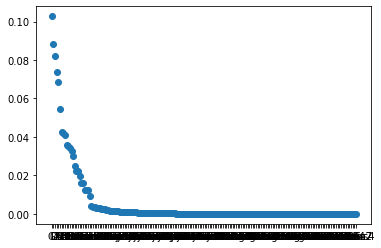

In [100]:
plt.scatter(count_chords.keys(), count_chords.values())
plt.show()

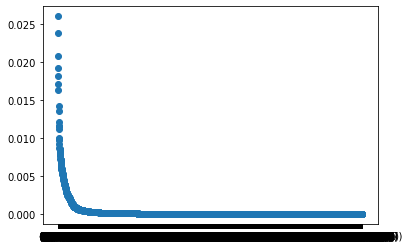

In [101]:
plt.scatter(chord_transitions.keys(), chord_transitions.values())
plt.show()

In [103]:
cum_sum_trans = []
cum_sum_chord = []

csc = 0
cst = 0

for c in count_chords.values():
    csc += c
    cum_sum_chord.append(csc)
    
for c in chord_transitions.values():
    csc += c
    cum_sum_trans.append(csc)

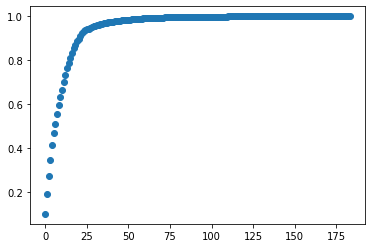

In [109]:
plt.scatter(list(range(len(cum_sum_chord))), cum_sum_chord)
plt.show()

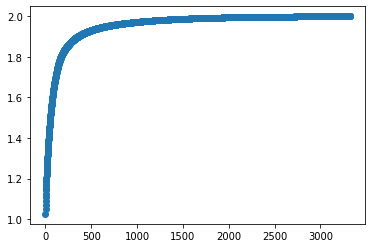

In [110]:
plt.scatter(list(range(len(cum_sum_trans))), cum_sum_trans)
plt.show()

In [320]:
def song_diff(song1, song2, verbose=True):
    c1 = song1['chords']
    c2 = song2['chords']
    return chord_lev(c1,c2, verbose=verbose)

In [321]:
a = 2
b = 8

print(song_diff(songs[a], songs[b]))
print(song_diff(songs[b], songs[a]))

[[   0.    1.    4. ...  201.  204.  209.]
 [   2.   -1.    2. ...  199.  202.  207.]
 [   5.   -4.   -1. ...  196.  199.  204.]
 ...
 [ 311. -310. -307. ... -110. -107. -102.]
 [ 314. -313. -310. ... -113. -110. -105.]
 [ 316. -315. -312. ... -115. -112. -107.]]
-107.0
[[   0.    2.    5. ...  311.  314.  316.]
 [   1.    1.    4. ...  310.  313.  315.]
 [   4.   -2.    1. ...  307.  310.  312.]
 ...
 [ 201. -199. -196. ...  110.  113.  115.]
 [ 204. -202. -199. ...  107.  110.  112.]
 [ 209. -207. -204. ...  102.  105.  107.]]
107.0


In [322]:
len(songs)

5835

In [325]:
# this is going to take forever and a half
# USE CUDA BIIIIIIIIIIIIII************** WOOOO
# ^^JK this killed me

l = len(songs)
diffs = np.zeros((l,l))
for i in range(l):
    for j in range(i,l):
        diffs[i][j] = song_diff(songs[i], songs[j], verbose=False)
        print(i,j,end="\r")

KeyboardInterrupt: 

In [226]:
print(songs[1]['chords'])

['Am', 'C', 'G', 'F', 'Am', 'C', 'G', 'F', 'Dm', 'G', 'C', 'F', 'Dm', 'G', 'Am', 'F', 'C', 'E', 'Am', 'F', 'C', 'E', 'Am', 'Am', 'C', 'G', 'F', 'Am', 'C', 'G', 'F', 'Dm', 'G', 'C', 'F', 'Dm', 'G', 'Am', 'F', 'C', 'E', 'Am', 'F', 'C', 'E', 'Am']


In [198]:
song_difficulty(songs[0]) * len(songs[0]['chords'])

472.0

In [195]:
song_difficulty(songs[1])

3.4347826086956523

test:
    take a song, random substring, compare to another random substring in the same song of the same length
    this should be zero??
    
phylogenetic tree reconstruction - bunch of DNA sequences, reconstruct the evolutionary tree that the DNA strands came from:
    classify songs into "families", see which songs evolve from others, 
    
tensor methods to incorporate variable time (???) -> parafac2 (deals with data not coming in at the same times).

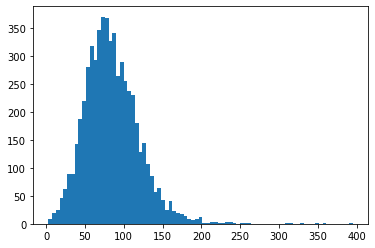

In [340]:
for song in songs:
    song['length'] = len(song['chords'])
song_lengths = [song['length'] for song in songs]
song_lengths.sort()
plt.hist(song_lengths, bins='auto')
plt.show()

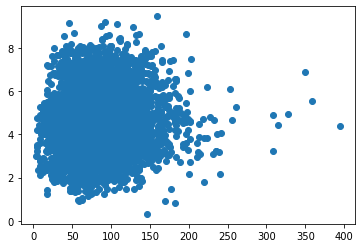

In [343]:
plt.scatter([song['length'] for song in songs], [song_difficulty(song) for song in songs])
plt.show()

In [345]:
song_difficulty(songs[8])

2.943661971830986

In [346]:
song_difficulty(songs[10])

3.75